In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_squared_error

file_path = r"C:\Users\aekmo\Downloads\Data_Pembelajaran_Mesin_DP\heart+failure+clinical+records\heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(file_path)

In [58]:
print("Isi Data:")
print(df.info())

df_clustering = df.drop(columns=["DEATH_EVENT"])

print("\nData untuk clustering (5 baris pertama):")
print(df_clustering.head())
print("\nJumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

print("\nBentuk data setelah standardisasi:", df_scaled.shape)

Isi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None

Da

In [68]:
silhouette_scores = {}
range_clusters = range(2, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_scores[k] = silhouette_score(df_scaled, labels)

best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Silhouette Score terbaik pada k={best_k}: {silhouette_scores[best_k]}")

C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

Silhouette Score terbaik pada k=2: 0.151212558971644


C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [20]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(df_scaled)

linkage_matrix = linkage(df_scaled, method='ward')
hierarchical_labels = fcluster(linkage_matrix, t=best_k, criterion='maxclust')

dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(df_scaled)
num_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)

print(f"DBSCAN menemukan {num_clusters_dbscan} cluster dengan {sum(dbscan_labels == -1)} data sebagai noise.")

DBSCAN menemukan 2 cluster dengan 287 data sebagai noise.


C:\Users\aekmo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [22]:
sse_kmeans = kmeans.inertia_
silhouette_kmeans = silhouette_score(df_scaled, kmeans_labels)
silhouette_hierarchical = silhouette_score(df_scaled, hierarchical_labels)

print("\nEvaluasi Clustering:")
print(f"K-Means -> SSE: {sse_kmeans}, Silhouette Score: {silhouette_kmeans}")
print(f"Hierarchical -> Silhouette Score: {silhouette_hierarchical}")
print(f"DBSCAN -> Jumlah cluster ditemukan: {num_clusters_dbscan}, Jumlah noise: {sum(dbscan_labels == -1)}")


Evaluasi Clustering:
K-Means -> SSE: 3201.1206280216056, Silhouette Score: 0.1178512561512019
Hierarchical -> Silhouette Score: 0.0881889039422954
DBSCAN -> Jumlah cluster ditemukan: 2, Jumlah noise: 287


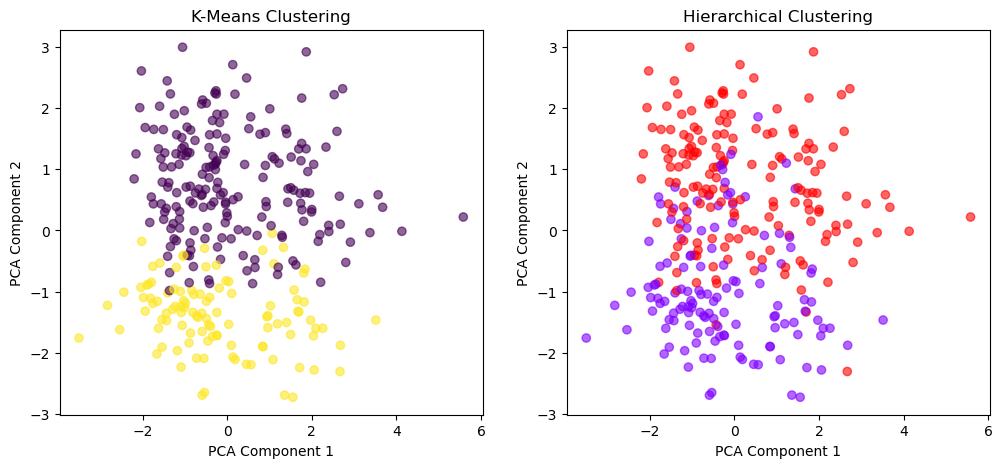

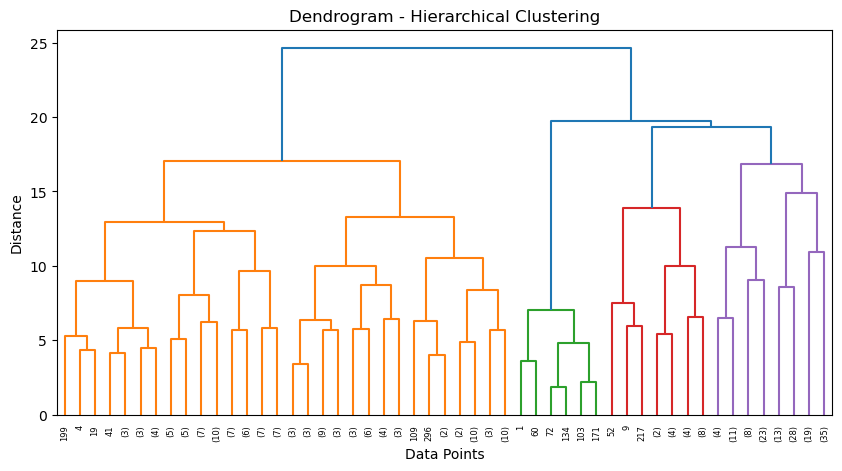

In [73]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title("K-Means Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")

plt.subplot(1, 2, 2)
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=hierarchical_labels, cmap='rainbow', alpha=0.6)
plt.title("Hierarchical Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, truncate_mode='level', p=5)
plt.title("Dendrogram - Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()